In [1]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
data_theorteical=pd.read_csv("C:\\Workplace\\Python\\AnalysisForThePaper\\NEH\\Final\\C# simulation data gen\\ConsoleApp2\\bin\\Debug\\0_035.csv")
data_theorteical=data_theorteical.dropna().iloc[:50,:].reset_index(drop=True)
print(data_theorteical.shape)

(50, 17)


In [3]:
data_withnoise=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\SNR\test_perprotien\0_035_with_noise.csv")
data_withnoise.shape
# data_withnoise.head()

(10000, 24)

In [4]:
neh_vals=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\SNR\test_perprotien\neh_ape_mpe_res.csv")
neh_vals.columns=[x.replace('DataRecord.','') for x in neh_vals.columns]
neh_vals.Protein=[x.replace('"',"") for x in neh_vals.Protein]
neh_vals.Peptide=[x.replace('"',"") for x in neh_vals.Peptide]
# neh_vals.head()
print(neh_vals.shape)

(12500, 34)


In [5]:
data=pd.concat([data_withnoise[['Protein', 'Peptide', 'Charge', 'NEH','I0', 'I1', 'I2','I3', 'I4', 'I5', 'SNR']],
                neh_vals[['NEH_sim', 'NEH_APE', 'NEH_MPE']] ],axis=1) 
# data.head(50)

In [6]:

merged=pd.merge(data_theorteical,data,on=['Protein', 'Peptide', 'Charge', 'NEH'])
print(merged.shape)
merged[['Peptide', 'Charge', 'NEH',  
        'I0_x', 'I1_x', 'I2_x', 'I3_x', 'I4_x', 'I5_x', 
       'I0_y', 'I1_y', 'I2_y', 'I3_y', 'I4_y', 'I5_y',
       'SNR']].tail(5)
merged["rss"]= (merged.I0_x - merged.I0_y)**2 + (merged.I1_x - merged.I1_y)**2+ (merged.I2_x - merged.I2_y)**2+(merged.I3_x - merged.I3_y)**2+(merged.I4_x - merged.I4_y)**2+(merged.I5_x - merged.I5_y)**2
merged['RD_neh_ape']=abs(merged.NEH-merged.NEH_APE)/merged.NEH
merged=merged[['Protein', 'Peptide', 'Charge', 'NEH', 'SNR', 'NEH_sim', 'NEH_APE', 'NEH_MPE','rss','RD_neh_ape']]
merged=merged.groupby(by=['Protein', 'Peptide', 'Charge', 'NEH', 'SNR']).median()
merged=merged.reset_index()
# min_val=min([x for x in merged.RD_neh_ape if x >  1E-10])
# merged.RD_neh_ape=[x if x > 1E-10 else min_val for x in merged.RD_neh_ape]
print(merged.shape)

(10000, 27)
(1000, 9)


Text(0, 0.5, 'ln ($\\dfrac { |{NEH_{computed}} -{ NEH }| } { NEH}$)')

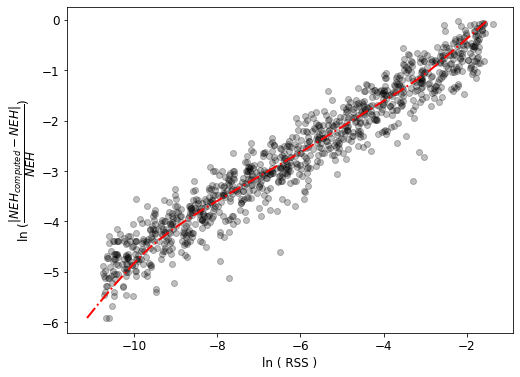

In [17]:

from statsmodels.nonparametric.smoothers_lowess import lowess
plt.figure(figsize=(8,6))
plt.rc('font', size=12)
ynew= lowess([math.log(x) for x in merged.rss],[math.log(x) for x in merged.RD_neh_ape],frac=1/3)
plt.plot(ynew[:,1],ynew[:,0],c='r',linewidth=2,alpha=0.99,ls='-.')

plt.scatter([math.log(x) for x in merged.rss],[math.log(x) for x in merged.RD_neh_ape],alpha=0.25,c='k')
plt.xlabel(r'ln ( RSS )')
plt.ylabel(r'ln ($\dfrac { |{NEH_{computed}} -{ NEH }| } { NEH}$)')

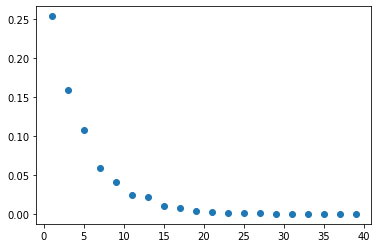

In [96]:
# plt.scatter(range(100),merged[merged.Peptide=='NLLSVAYK'].SNR)
plt.scatter(merged[merged.Peptide=='NLLSVAYK'].SNR,merged[merged.Peptide=='NLLSVAYK'].rss)

In [128]:
# plt.scatter(merged[merged.Peptide=='NLLSVAYK'].SNR,[math.log(x) for x in merged[merged.Peptide=='NLLSVAYK'].rss])
# plt.scatter([math.log(x) for x in merged[merged.Peptide=='NLLSVAYK'].rss],[math.log(x) for x in merged[merged.Peptide=='NLLSVAYK'].RD_neh_ape])
# temp=merged[merged.Peptide=='NLLSVAYK']

temp=merged[merged.SNR==60]
min_val=min([x for x in temp.RD_neh_ape if x!=0])
temp.RD_neh_ape=[x if x !=0 else min_val for x in temp.RD_neh_ape]
plt.scatter([math.log(x) for x in temp.rss],[math.log(x) for x in temp.RD_neh_ape])

ValueError: min() arg is an empty sequence

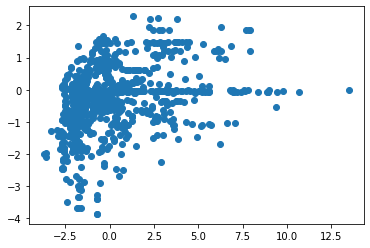

In [129]:

temp=merged.groupby(by=['Protein', 'Peptide', 'Charge', 'NEH', 'SNR']).median()
temp=temp.reset_index()
temp=temp[temp.SNR<40]
# temp.head(16)
plt.scatter([math.log(x) for x in temp.rss],[math.log(x) for x in temp.RD_neh_ape])

In [107]:
print(merged.shape)
merged=merged.dropna()
print(merged.shape)


(500, 9)
(500, 9)


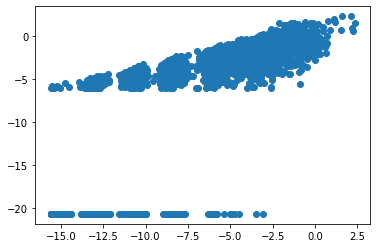

In [18]:
plt.scatter([math.log(x) for x in merged.rss],[math.log(x+1E-9) for x in ])

In [200]:
# [math.log(x+1E-9) for x in abs(merged.NEH-merged.NEH_APE)/merged.NEH]

In [204]:
merged.tail(50)

,Protein,Peptide,Charge,NEH,SNR,rss,NEH_APE,NEH_MPE,RD_neh
0,1433B_MOUSE,NLLSVAYK,2,11,60,4.446520e-07,11.0,11.006135,-2.302585
1,1433B_MOUSE,NLLSVAYK,2,11,50,5.035098e-06,10.9,11.353846,-2.215574
2,1433B_MOUSE,NLLSVAYK,2,11,40,3.217748e-05,10.8,12.642844,-2.135531
3,1433B_MOUSE,NLLSVAYK,2,11,30,3.097147e-04,10.1,6.679475,-1.704748
4,1433B_MOUSE,NLLSVAYK,2,11,10,3.392160e-02,11.4,1.000000,-1.992430
5,1433B_MOUSE,NLLSVAYK,2,11,5,1.439757e-01,26.4,1.000000,0.405465
6,1433B_MOUSE,NLLSVAYK,2,11,3,2.455989e-01,69.5,1.000000,1.689760


[25, 24, 21, 17, 29, 25]

1
2
3
4
5
6


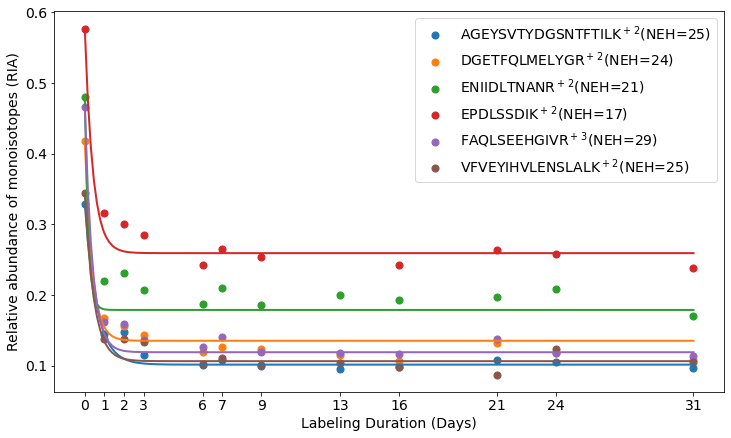

In [178]:
plt.figure(figsize=(12,7))
plt.rc('font',size=14)
colors=['#4285F4','#EA4335','#FBBC04','#34A853','#202124','m']
neh=[25,24,21,17,29,25] 
for i in range(1,7):
    print(i)
    # if i ==1: continue
    data=pd.read_csv(rf"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\rate_neh_plot\mup20\{i}.csv") 
    plt.scatter(data['RIA.Time'],data['RIA.RIA_value'],s=50,label=f"{data['RIA.PeptideSeq'][0]}$^+$$^{data['RIA.Charge'][0]}$(NEH={neh[i-1]})")
    data=pd.read_csv(rf"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\rate_neh_plot\mup20\{i}_t.csv") 
    plt.plot(data['TheoreticalI0Value.time'],data['TheoreticalI0Value.value'],lw=2)
    
    
data=pd.read_csv(rf"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\rate_neh_plot\mup20\{i}.csv") 
plt.xticks(data['RIA.Time'])
plt.legend()
plt.xlabel('Labeling Duration (Days)')
plt.ylabel('Relative abundance of monoisotopes (RIA)')
plt.savefig("plot.jpeg",dpi=900)